# Import Libraries 

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
##% matplotlib inline 
import math

# Collection of Data

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
print ("# of students in original data: " +str(len(data.index)))

# of students in original data: 1000


# Analyzing Data

We first visualize how many students completed test prepration course in given data

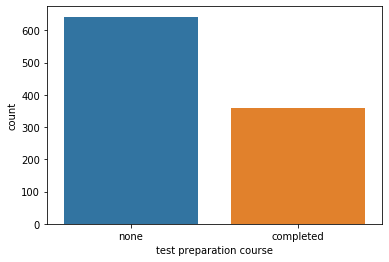

In [4]:
sns.countplot(x = "test preparation course", data = data)

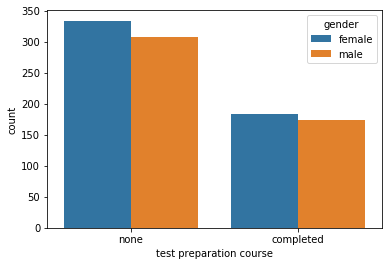

In [5]:
sns.countplot(x = "test preparation course", hue = "gender" ,  data = data)

Visualing race/ethnicity of students who completed test preparation course with respact to gender 

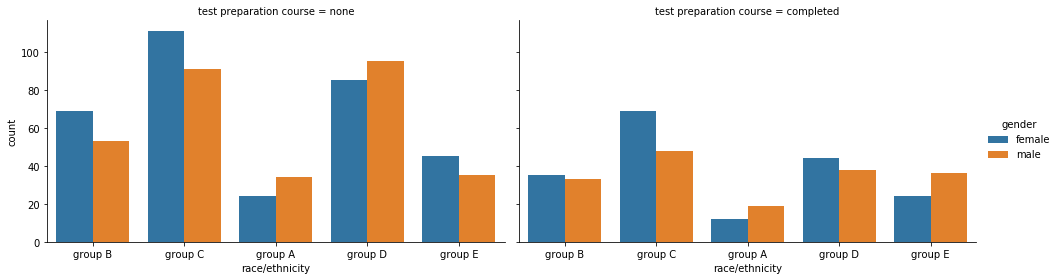

In [6]:
g = sns.catplot(x = "race/ethnicity", hue = "gender" ,  col="test preparation course",
                data=data, kind="count",
                height=4, aspect=1.7)

Visualizing parental eductaion with completeness of test preparation of course 
It can be seen that students whose parents have asscociate's degree have higher probability of completing test preparation course 

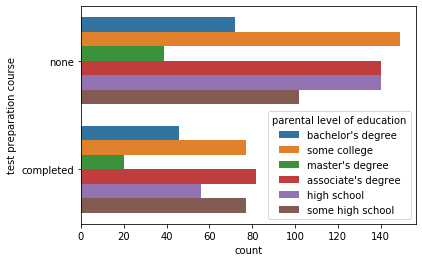

In [7]:
sns.countplot(y = "test preparation course", hue = "parental level of education" ,  data = data)

The highest perecentage of student who colmpleted test prepartion course is of Group C which is 42.86

In [8]:
Race = data.groupby("race/ethnicity")

In [9]:
GroupA = Race.get_group('group A')
GroupB = Race.get_group('group B')
GroupC = Race.get_group('group C')
GroupD = Race.get_group('group D')
GroupE = Race.get_group('group E')
def percent (Group):
    count = 0
    for i in range (len(Group)):
        if Group.iloc[i,4] == "completed":
            count = count + 1
    percent = 0
    percent = float((count/len(Group))*100)
    return percent
print ("Percentage of Students from Group A who completed course: %.2f" %(percent(GroupA)))
print ("Percentage of Students from Group B who completed course: %.2f" %(percent(GroupB)))
print ("Percentage of Students from Group C who completed course: %.2f" %(percent(GroupC)))
print ("Percentage of Students from Group D who completed course: %.2f" %(percent(GroupD)))
print ("Percentage of Students from Group E who completed course: %.2f" %(percent(GroupE)))


Percentage of Students from Group A who completed course: 34.83
Percentage of Students from Group B who completed course: 35.79
Percentage of Students from Group C who completed course: 36.68
Percentage of Students from Group D who completed course: 31.30
Percentage of Students from Group E who completed course: 42.86


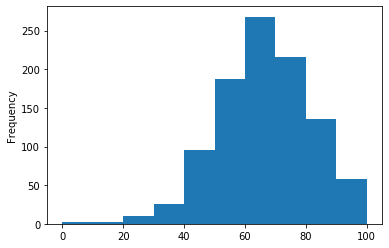

In [10]:
data["math score"].plot.hist()

In [11]:
print("Mean of Math Score is: %.2f" %data["math score"].mean())

Mean of Math Score is: 66.09


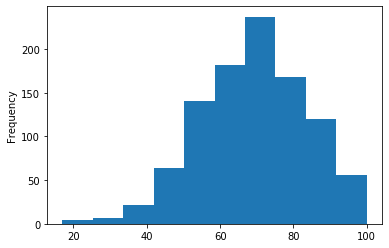

In [12]:
data["reading score"].plot.hist()

In [13]:
print("Mean of Reading Score is: %.2f" %data["reading score"].mean())

Mean of Reading Score is: 69.17


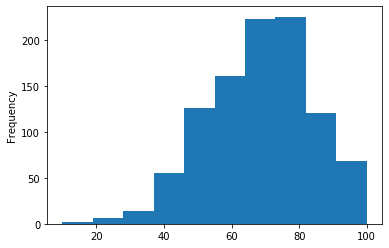

In [14]:
data["writing score"].plot.hist()

In [15]:
print("Mean of Writing Score is: %.2f" %data["writing score"].mean())

Mean of Writing Score is: 68.05


# Cleaning Data and Mining 

Checking data info 

In [ ]:
 data ["Brunei Darussalam"] 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking Null Values in our data

In [17]:
data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [18]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Visualizing the cleaness of data 

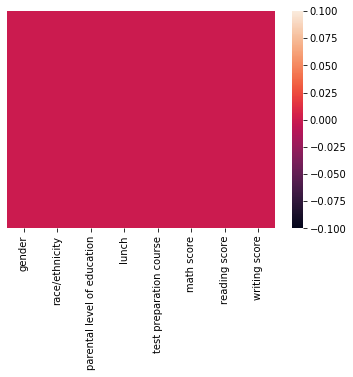

In [19]:
sns.heatmap(data.isnull(), yticklabels = False)

Using labe encoder to change string values to integer so that it can be used in machine learning model

In [20]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
data['test preparation course value'] = labelencoder.fit_transform(data["test preparation course"])
data['parental level of education value'] = labelencoder.fit_transform(data["parental level of education"])
data['race/ethnicity value'] = labelencoder.fit_transform(data["race/ethnicity"])
data['gendervalue'] = labelencoder.fit_transform(data["gender"])
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,test preparation course value,parental level of education value,race/ethnicity value,gendervalue
0,female,group B,bachelor's degree,standard,none,72,72,74,1,1,1,0
1,female,group C,some college,standard,completed,69,90,88,0,4,2,0
2,female,group B,master's degree,standard,none,90,95,93,1,3,1,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,1
4,male,group C,some college,standard,none,76,78,75,1,4,2,1


Dropping unwnated data from our data frame

In [21]:
data = data.drop('gender', 1)
data = data.drop('parental level of education', 1)
data = data.drop('lunch', 1)
data = data.drop('race/ethnicity', 1)
data = data.drop('test preparation course', 1)
data.head(5)

,math score,reading score,writing score,test preparation course value,parental level of education value,race/ethnicity value,gendervalue
0,72,72,74,1,1,1,0
1,69,90,88,0,4,2,0
2,90,95,93,1,3,1,0
3,47,57,44,1,0,0,1
4,76,78,75,1,4,2,1


Finding Sum of scores and adding new column

In [22]:
Sumscore = []
for i in range (1000):
    Sumscore.append(data.iloc[i,0] + data.iloc[i,1] + data.iloc[i,2])
data['Sumscore'] = Sumscore
data.head(5)


,math score,reading score,writing score,test preparation course value,parental level of education value,race/ethnicity value,gendervalue,Sumscore
0,72,72,74,1,1,1,0,218
1,69,90,88,0,4,2,0,247
2,90,95,93,1,3,1,0,278
3,47,57,44,1,0,0,1,148
4,76,78,75,1,4,2,1,229


# Machine Learning Model 

# Train data 

In [23]:
X = data["parental level of education value"].values
y = data["test preparation course value"]
X = X.reshape((1000,1))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
lmodel = LogisticRegression ()
lmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
predictions = lmodel.predict(X_test)
classification_report(y_test, predictions)

C:\Users\Hassan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        62\n           1       0.69      1.00      0.82       138\n\n    accuracy                           0.69       200\n   macro avg       0.34      0.50      0.41       200\nweighted avg       0.48      0.69      0.56       200\n'

In [26]:
cm = confusion_matrix (y_test, predictions)

In [27]:
accuracy = accuracy_score(y_test, predictions)

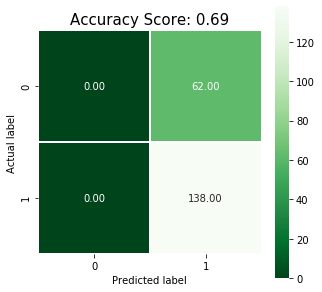

In [28]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [29]:
reg = LinearRegression()
X = data['math score'].values
Y = data['Sumscore'].values
X = X.reshape((1000,1))
X_train = X[:700]
X_test = X[700:1000]
Y_train = Y[:700]
Y_test = Y[700:1000]
reg = reg.fit(X_train,Y_train)

Coefficients: 
 [2.60609118]
Mean squared error: 289.85
Coefficient of determination: 0.84


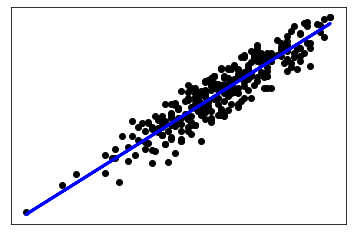

In [30]:
y_pred = reg.predict(X_test)

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, y_pred))

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()